### Coulmns Info
- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- Skin Thickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/(키(m)^2))
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outccome: 클래스 결정 값(0 or 1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(5)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Set a function to print evaluation metric
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    F1 = f1_score(y_test, pred)
    AUC = roc_auc_score(y_test, pred_proba)

    print('Confusion matrix:\n', confusion)
    print('\nAccurcy: {:.4f}'.format(accuracy))
    print('Precision: {:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [5]:
# Precision-Recall Curve Plot
def precision_recall_curve_plot(y_test=None, pred_proba=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x =  threshold, y = Precision, 
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold's X scale change to 0.1
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision and recall value')
    plt.legend()
    plt.grid()
    plt.show()

### Training and Predict with Logistic Regression

In [6]:
x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156, stratify=y)

# training and predict
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

Confusion matrix:
 [[87 13]
 [22 32]]

Accurcy: 0.7727
Precision: 0.7111
Recall: 0.5926
F1: 0.6465
AUC: 0.8083


### Curve plot precision and recall

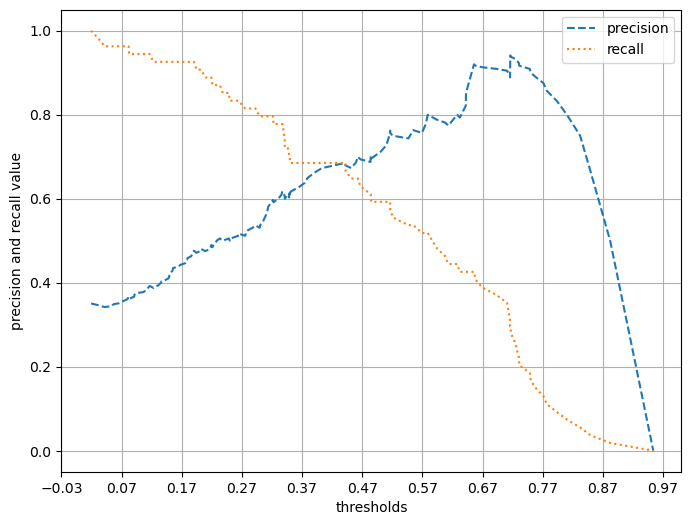

In [7]:
pred_proba = lr_clf.predict_proba(x_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)

### Quaternary distribution of each Features

In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


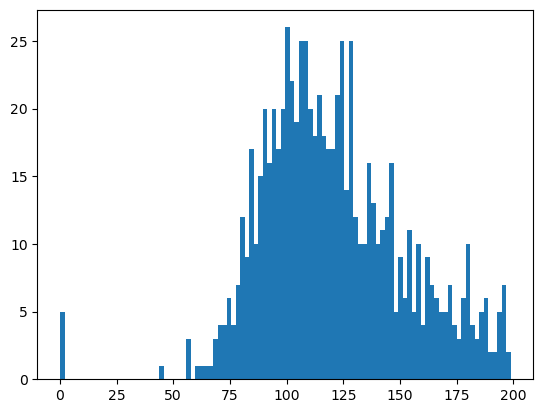

In [9]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

### Check and replace data what include 0 value

In [10]:
# Features list to check
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Amount of all data
total_count = diabetes_data['Glucose'].count()

# Extract and calculate 0 value of data
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f'{feature} 건수는 {zero_count}, 퍼센트는 {100*zero_count/total_count:.2f}')

Glucose 건수는 5, 퍼센트는 0.65
BloodPressure 건수는 35, 퍼센트는 4.56
SkinThickness 건수는 227, 퍼센트는 29.56
Insulin 건수는 374, 퍼센트는 48.70
BMI 건수는 11, 퍼센트는 1.43


In [11]:
# Replace 0 values to mean of other values
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [12]:
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f'{feature} 건수는 {zero_count}, 퍼센트는 {100*zero_count/total_count:.2f}')

Glucose 건수는 0, 퍼센트는 0.00
BloodPressure 건수는 0, 퍼센트는 0.00
SkinThickness 건수는 0, 퍼센트는 0.00
Insulin 건수는 0, 퍼센트는 0.00
BMI 건수는 0, 퍼센트는 0.00


### Scaling with StandardScale and training that data

In [13]:
x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# scaling with standardscler class
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156, stratify=y)

# training with Logistic regression
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

Confusion matrix:
 [[88 12]
 [22 32]]

Accurcy: 0.7792
Precision: 0.7273
Recall: 0.5926
F1: 0.6531
AUC: 0.8433


### Evaluation metric during change classification threshold

In [14]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba, threshold):
    # Iteration and Evaluation each threshold in list
    for custom_threshold in thresholds:
        binzrizer = Binarizer(threshold=custom_threshold).fit(pred_proba)
        custom_predict = binzrizer.transform(pred_proba)
        print(f'Treshold: {custom_threshold}')
        get_clf_eval(y_test, custom_predict, pred_proba)

In [15]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(x_test)

get_eval_by_threshold(y_test, pred_proba[:, -1].reshape(-1, 1), thresholds)

Treshold: 0.3
Confusion matrix:
 [[66 34]
 [ 9 45]]

Accurcy: 0.7208
Precision: 0.5696
Recall: 0.8333
F1: 0.6767
AUC: 0.8433
Treshold: 0.33
Confusion matrix:
 [[74 26]
 [12 42]]

Accurcy: 0.7532
Precision: 0.6176
Recall: 0.7778
F1: 0.6885
AUC: 0.8433
Treshold: 0.36
Confusion matrix:
 [[78 22]
 [14 40]]

Accurcy: 0.7662
Precision: 0.6452
Recall: 0.7407
F1: 0.6897
AUC: 0.8433
Treshold: 0.39
Confusion matrix:
 [[83 17]
 [16 38]]

Accurcy: 0.7857
Precision: 0.6909
Recall: 0.7037
F1: 0.6972
AUC: 0.8433
Treshold: 0.42
Confusion matrix:
 [[83 17]
 [17 37]]

Accurcy: 0.7792
Precision: 0.6852
Recall: 0.6852
F1: 0.6852
AUC: 0.8433
Treshold: 0.45
Confusion matrix:
 [[84 16]
 [19 35]]

Accurcy: 0.7727
Precision: 0.6863
Recall: 0.6481
F1: 0.6667
AUC: 0.8433
Treshold: 0.48
Confusion matrix:
 [[85 15]
 [21 33]]

Accurcy: 0.7662
Precision: 0.6875
Recall: 0.6111
F1: 0.6471
AUC: 0.8433
Treshold: 0.5
Confusion matrix:
 [[88 12]
 [22 32]]

Accurcy: 0.7792
Precision: 0.7273
Recall: 0.5926
F1: 0.6531
AUC: 0

In [16]:
# Create Binarizer what threshold=0.48, 0.39
binarizer1 = Binarizer(threshold=0.48)
binarizer2 = Binarizer(threshold=0.39)

# Transform column what predict percent is 1 in above binarizer
pred_th_048 = binarizer1.fit_transform(pred_proba[:, 1].reshape(-1, 1))
pred_th_039 = binarizer2.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])
get_clf_eval(y_test, pred_th_039, pred_proba[:, 1])

Confusion matrix:
 [[85 15]
 [21 33]]

Accurcy: 0.7662
Precision: 0.6875
Recall: 0.6111
F1: 0.6471
AUC: 0.8433
Confusion matrix:
 [[83 17]
 [16 38]]

Accurcy: 0.7857
Precision: 0.6909
Recall: 0.7037
F1: 0.6972
AUC: 0.8433
